### 1. Collecting the Data

In [1]:
import pandas as pd # type: ignore

df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 2. Data Cleaning

In [2]:
df.shape

(101, 18)

In [3]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
df['legs'].value_counts()

legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [5]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df_cat = df.iloc[:, 1:]

In [8]:
df_cat.

SyntaxError: invalid syntax (2939119937.py, line 1)

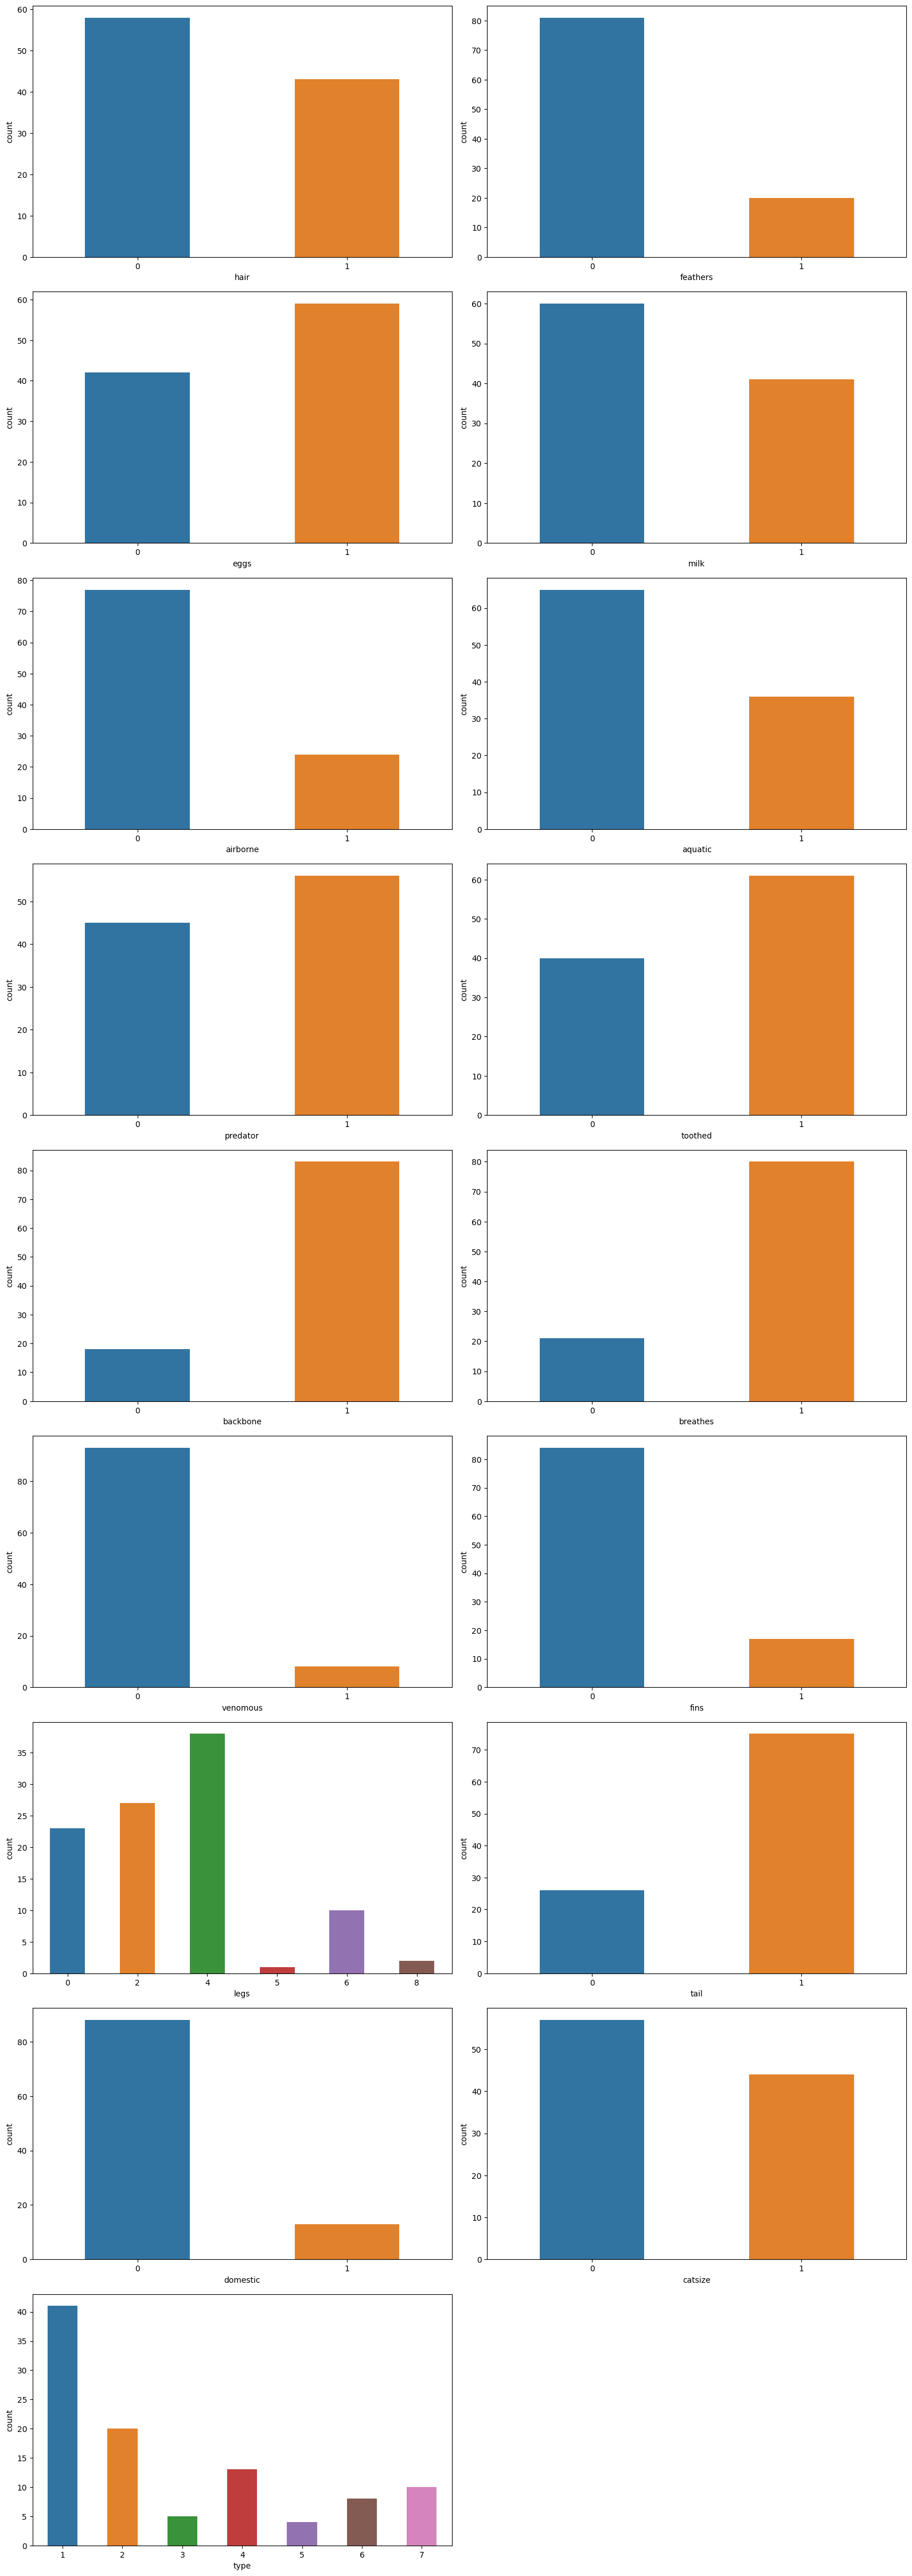

In [ ]:
num_columns = len(df_cat.columns)
rows = (num_columns + 1) // 2  # Integer division for ceiling

# Create a figure with the desired layout
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 5))  # Adjust figsize for wider plots

# Iterate through columns and create countplots
column_index = 0
for i in range(rows):
    for j in range(2):
        if column_index < num_columns:
            column_name = df_cat.columns[column_index]
            sns.countplot(x=column_name, data=df_cat, width=0.5, ax=axes[i, j])
            column_index += 1
        else:
            axes[i, j].axis('off')  # Hide empty subplots

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

<Axes: >

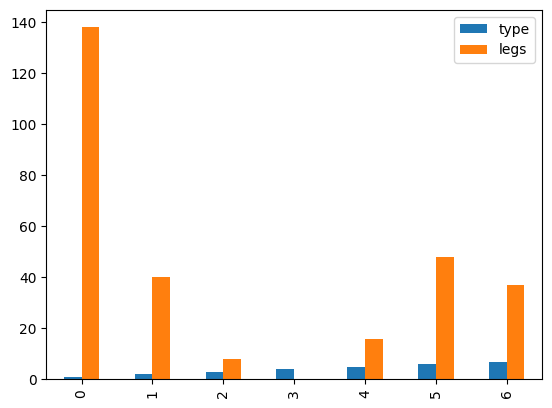

In [ ]:
df1 = df.groupby('type')[['legs']].sum().reset_index()
df1.plot(kind = 'bar')

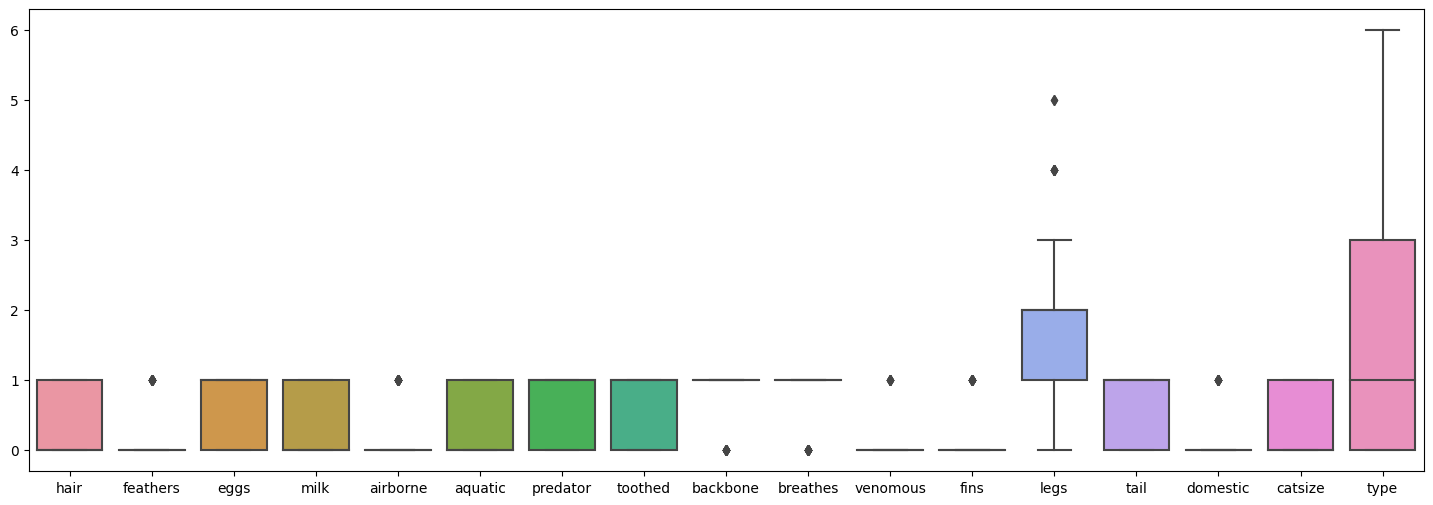

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18, 6))
sns.boxplot(data=df)
plt.show()

### 3. Data Transformation

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['legs'] = le.fit_transform(df[['legs']])
df['type'] = le.fit_transform(df[['type']])
df.head()

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0


In [ ]:
X = df.iloc[:, 1:-1]
Y = df[['type']]

In [ ]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1


### 4. Data Partition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Model Fitting

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train.values, Y_train)

Y_pred_train = model.predict(X_train.values)
Y_pred_test = model.predict(X_test.values)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# Metrics

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1.round(3))
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.912
Test Accuracy score: 0.762


### 5. Data Validation

In [ ]:
# Cross Validation

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

Cross validation - Training accuracy: 0.94
Cross validation - Test accuracy: 0.89


C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 100, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train.values, Y_train)
        y_pred_train = knn.predict(X_train.values)
        y_pred_test = knn.predict(X_test.values)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))

print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

Training Accuracies: [0.94, 0.91, 0.87, 0.83, 0.81, 0.8, 0.79]
Test Accuracies: [0.89, 0.85, 0.82, 0.8, 0.78, 0.78, 0.78]


C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


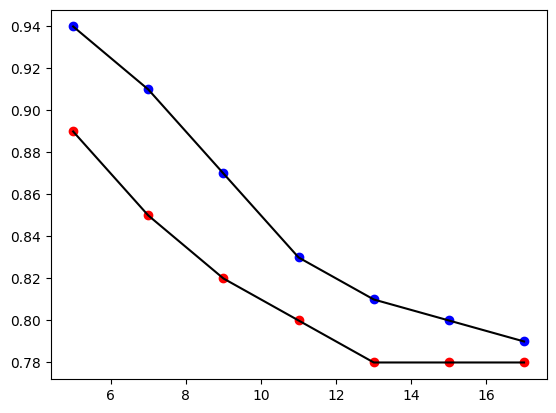

In [ ]:
import matplotlib.pyplot as plt # type: ignore
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='black')
plt.show()

In [ ]:
# Finalized model

# KNN
from sklearn.neighbors import KNeighborsClassifier # type: ignore
model = KNeighborsClassifier(n_neighbors=7, )
model.fit(X_train.values, Y_train)
Y_pred_train = model.predict(X_train.values)
Y_pred_test = model.predict(X_test.values)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# metrics
from sklearn.metrics import accuracy_score # type: ignore
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1.round(3))
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.912
Test Accuracy score: 0.905


By applting the cross validation for every K value, we got better accuracies for K = 7,
where the variance between the accuracies is also less.

Therefore, we have got the training and testing accuracy as 91.2% and 90.5% respectively.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         6
           4       0.00      0.00      0.00         0
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.67      0.71      0.69        21
weighted avg       0.87      0.90      0.89        21



C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

1. What are the key hyperparameters in KNN?

The hyper parameters in KNN are n_neighbors which determines the number of neighbors to consider when making a prediction. Metric which defines the distance metric used to calculate the distance between the data points.

2. What distance metrices can be used in KNN?

The distance metrices that can be used in KNN are 'eucledian' (Straight line distance), 'manhattan' (City block distance), and 'minkowski' (Generalization of euclidean and manhattan).